### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
stockx = pd.read_excel('StockX_Dataset.xlsx')

In [4]:
stockx.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [7]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [8]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

#### Brand vs Buyer Region

In [27]:
stockxContingencyTable = create_contingency_table(stockx, 'Brand','Buyer Region')

In [28]:
stockxContingencyTable

Brand,Yeezy,Off-White
Buyer Region,,
Alabama,375,82
Alaska,41,20
Arizona,1005,393
Arkansas,141,32
California,13113,6236
Colorado,702,252
Connecticut,844,266
Delaware,818,424
District of Columbia,190,81


<AxesSubplot:xlabel='Buyer Region'>

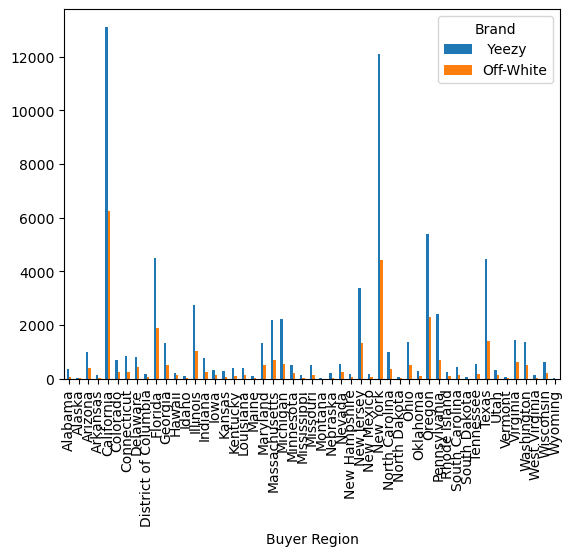

In [29]:
stockxContingencyTable.plot(kind='bar')

In [30]:
check_cat_vs_cat_correlation(stockx, 'Brand','Buyer Region')

The odds of a correlation between Brand and Buyer Region is 100.0% (Based on a p value of 6.274294904263462e-107).
This percentage needs to be at least 95% for a significant correlation.


Het is voor mijn gevoel best logisch dat er een 100% correlatie is tussen Brand en Buyer Region. Als je dus in 1 van deze staaten zou wonen zou je altijd een Yeezy of Off-White sneaker hebben. Dit is omdat deze dataset orders zijn en er geen staat is die geen orders heeft. Als de dataset wat uitgebreider was met meerdere Brands zou de correlatie lager zijn.